In [2]:
from google.colab import drive
drive.mount('/content/drive')
f1csv = 'drive/MyDrive/championship/finance/F_F1A_1415-1920_data.csv'
f2csv = 'drive/MyDrive/championship/finance/F_F2_1415-1920_data.csv'
f3csv = 'drive/MyDrive/championship/finance/F_F3_1415-1920_data.csv'

Mounted at /content/drive


In [4]:
import pandas as pd

f1 = pd.read_csv(f1csv)
f2 = pd.read_csv(f2csv)
f3 = pd.read_csv(f3csv)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (177) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (130) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
f1namesfile = 'drive/MyDrive/championship/finance/F_F1A_1415-1920_data_descriptions.xlsx'
f1names = pd.read_excel(f1namesfile)

In [6]:
f2namesfile = 'drive/MyDrive/championship/finance/F_F2_1415-1920_data_descriptions.xlsx'
f2names = pd.read_excel(f2namesfile)

In [7]:
f3namesfile = 'drive/MyDrive/championship/finance/F_F3_1415-1920_data_descriptions.xlsx'
f3names = pd.read_excel(f3namesfile)

In [8]:
stuf = 'drive/MyDrive/championship/df_student_fee.csv'
stu = pd.read_csv(stuf)

In [9]:
insts = 'drive/MyDrive/championship/df_institutional_master.csv'
inst = pd.read_csv(insts)

In [10]:
allpub = 'drive/MyDrive/championship/df_all_pub.csv'
pub_abs = pd.read_csv(allpub)

In [11]:
cpiplot = 'drive/MyDrive/championship/cpi.csv'
cpi = pd.read_csv(cpiplot)

In [10]:
import re
import matplotlib.pyplot as plt
import seaborn 
import numpy as np
seaborn.set()

## Student

In [216]:
#stu = stu.drop(columns=['Unnamed: 0'])
stu.head()

,year,unitid,fee_tuition1,fee_fee1,fee_hrchg1,fee_tuition2,fee_fee2,fee_hrchg2,fee_tuition3,fee_fee3,...,fee_tuition7,fee_fee7,fee_hrchg7,fee_chg3tgtd,fee_chg3fgtd,fee_chg4ay3,fee_chg3ay3,fee_chg6ay3,fee_chg7ay3,fee_chg8ay3
0,2021.0,100654,8610.0,1414.0,287.0,8610.0,1414.0,287.0,17220.0,1414.0,...,20160.0,1414.0,840.0,NaN,NaN,1600.0,18634.0,3090.0,9520.0,3090.0
1,2020.0,100654,8610.0,1414.0,287.0,8610.0,1414.0,287.0,17220.0,1414.0,...,20160.0,1414.0,840.0,NaN,NaN,1600.0,18634.0,3090.0,9240.0,3090.0
2,2019.0,100654,8610.0,1414.0,287.0,8610.0,1414.0,287.0,17220.0,1414.0,...,20160.0,1414.0,840.0,NaN,NaN,1600.0,18634.0,3090.0,9240.0,3090.0
3,2018.0,100654,8610.0,1134.0,287.0,8610.0,1134.0,287.0,17220.0,1134.0,...,20160.0,1134.0,840.0,NaN,NaN,1600.0,18354.0,2990.0,9128.0,2990.0
4,2017.0,100654,8379.0,1478.0,274.0,8379.0,1478.0,274.0,16758.0,1478.0,...,16758.0,1478.0,836.0,NaN,NaN,1600.0,18236.0,2580.0,8379.0,2580.0


In [11]:
feecols = [c for c in list(pub_abs.columns) if c.startswith("fee_")]

In [12]:
pub_abs.head()

,Unnamed: 0,unitid,instnm,ialias,stabbr,zip,obereg,iclevel,control,ugoffer,...,fee_fee7,fee_hrchg7,fee_chg3tgtd,fee_chg3fgtd,fee_chg4ay3,fee_chg3ay3,fee_chg6ay3,fee_chg7ay3,fee_chg8ay3,time
0,0,100654,Alabama A & M University,AAMU,Alabama,35762,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Four or more years,Public,Undergraduate degree or certificate offering,...,1596.0,786.0,NaN,NaN,1600.0,17136.0,3790.0,8140.0,3790.0,0.0
1,1,100654,Alabama A & M University,AAMU,Alabama,35762,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Four or more years,Public,Undergraduate degree or certificate offering,...,1236.0,826.0,NaN,NaN,1600.0,17496.0,3090.0,8830.0,3090.0,1.0
2,2,100654,Alabama A & M University,AAMU,Alabama,35762,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Four or more years,Public,Undergraduate degree or certificate offering,...,1478.0,836.0,NaN,NaN,1600.0,18236.0,2580.0,8379.0,2580.0,2.0
3,3,100654,Alabama A & M University,AAMU,Alabama,35762,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Four or more years,Public,Undergraduate degree or certificate offering,...,1134.0,840.0,NaN,NaN,1600.0,18354.0,2990.0,9128.0,2990.0,3.0
4,4,100654,Alabama A & M University,AAMU,Alabama,35762,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Four or more years,Public,Undergraduate degree or certificate offering,...,1414.0,840.0,NaN,NaN,1600.0,18634.0,3090.0,9240.0,3090.0,4.0


In [67]:
stucol = list(stu.columns)
stucol.remove("year")
stucol.remove("unitid")

In [13]:
feesum = pub_abs.groupby(['year'], as_index=False)[feecols].median()
feesum

,year,fee_tuition1,fee_fee1,fee_hrchg1,fee_tuition2,fee_fee2,fee_hrchg2,fee_tuition3,fee_fee3,fee_hrchg3,...,fee_tuition7,fee_fee7,fee_hrchg7,fee_chg3tgtd,fee_chg3fgtd,fee_chg4ay3,fee_chg3ay3,fee_chg6ay3,fee_chg7ay3,fee_chg8ay3
0,2015.0,3648.0,600.0,139.5,4080.0,604.0,159.5,8726.0,675.5,330.0,...,16617.0,1322.0,823.5,0.0,0.0,1280.0,9784.0,3126.0,8476.0,3765.0
1,2016.0,3750.0,629.5,145.0,4200.0,635.5,163.0,8999.0,721.0,340.0,...,17347.0,1376.0,840.0,0.0,0.0,1300.0,10082.0,3160.0,8625.0,3786.0
2,2017.0,3922.0,688.0,149.5,4341.0,691.0,169.0,9176.0,754.0,345.0,...,17636.0,1405.0,850.0,0.0,0.0,1302.0,10343.5,3179.0,8875.0,3804.0
3,2018.0,4026.0,709.0,155.5,4582.0,720.0,173.0,9360.0,780.0,354.5,...,17898.0,1404.0,881.0,0.0,0.0,1326.0,10448.0,3167.5,9000.0,3900.0
4,2019.0,4102.0,736.0,160.0,4620.0,738.0,179.0,9467.0,816.0,361.0,...,17407.0,1452.0,886.5,0.0,0.0,1344.0,10563.0,3270.0,9231.0,4013.0
5,2020.0,4248.0,744.0,161.0,4650.0,750.0,181.0,9494.0,837.0,360.0,...,17627.0,1409.0,885.0,0.0,0.0,1280.0,10608.0,3325.0,9424.0,4128.0
6,2021.0,4320.0,750.0,160.5,4740.5,750.0,183.5,9575.5,838.0,361.0,...,17586.5,1473.5,880.0,0.0,0.0,1260.0,10749.0,3386.0,9639.0,4206.0


In [14]:
feetab = feesum.transpose()
feetab.to_excel('sum_table_student_fee.xlsx') 
!cp sum_table_student_fee.xlsx "drive/My Drive/championship/"

# F1

## Preprocess

In [12]:
f1

,unitid,f1a01,f1a31,f1a04,f1a05,f1a06,f1a07,f1a08,f1a09,f1a10,...,f1h03b,f1h03c,f1h03d,f1n01,f1n02,f1n03,f1n04,f1n05,f1n06,year
0,100654,7.853571e+07,1.157264e+08,1.342300e+04,1.157398e+08,1.942755e+08,1623631.0,62725127.0,64348758.0,60180723.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
1,100663,1.204895e+09,1.538321e+09,1.211609e+09,2.749930e+09,3.954826e+09,34097783.0,470132852.0,504230635.0,874533980.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
2,100706,1.424860e+08,2.383018e+08,7.910217e+07,3.174039e+08,4.598899e+08,4870600.0,68946069.0,73816669.0,98826636.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
3,100724,4.602033e+07,2.988681e+08,1.663636e+07,3.155044e+08,3.615248e+08,6789559.0,33059641.0,39849200.0,213075250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
4,100733,4.503448e+06,1.334091e+07,8.826359e+06,2.216727e+07,2.667072e+07,0.0,4137096.0,4137096.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,491844,2.403380e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.403380e+05,0.0,2033960.0,2033960.0,0.0,...,NaN,NaN,NaN,-197804.0,2791352.0,-197804.0,-1793622.0,0.0,0.0,1920
11820,492263,1.980006e+08,4.287563e+07,4.249131e+08,4.677887e+08,6.657893e+08,951827.0,97209965.0,98161792.0,6719776.0,...,55351766.0,-47644498.0,-10619191.0,46332159.0,193560826.0,56019044.0,210639104.0,40208598.0,0.0,1920
11821,492689,1.062724e+08,8.489074e+07,3.037778e+08,3.886686e+08,4.949409e+08,0.0,27946731.0,27946731.0,0.0,...,8222135.0,0.0,-16444270.0,37804616.0,310119184.0,3991595.0,416950817.0,229627237.0,0.0,1920
11822,493725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920


In [13]:
copied = list(f1[f1['year'] == 1415]['f1c197'])
f1['f1c19in'][0:len(copied)] = copied

<ipython-input-13-2ab25b185f1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['f1c19in'][0:len(copied)] = copied


In [14]:
f1_dropped = f1.drop(columns=['f1c197'])

In [15]:
newnames = []
for c in f1_dropped.columns:
  if c == 'unitid':
    n = c
  elif c == 'year':
    n = 'year'
  else:
    cap = c.upper()
    n = list(f1names[f1names['varname'] == cap]['shortDescription'])[0]
    n = n.lower()
    n = n.strip()
    n = " ".join(n.split())
  newnames.append(n)

In [16]:
f1_new = f1_dropped.set_axis(newnames, axis = 1, inplace = False)

In [17]:
f1_new['endyear'] = f1_new['year'] % 100

In [18]:
f1_new

,unitid,total current assets,"depreciable capital assets, net of depreciation",other noncurrent assets,total noncurrent assets,total assets,"long-term debt, current portion",other current liabilities,total current liabilities,long-term debt,...,spending distribution for current use,other changes in value of endowment net assets,operating income (loss) + net nonoperating revenues (expenses),operating revenues + nonoperating revenues,change in net position,net position,expendable net assets,plant-related debt,year,endyear
0,100654,7.853571e+07,1.157264e+08,1.342300e+04,1.157398e+08,1.942755e+08,1623631.0,62725127.0,64348758.0,60180723.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415,15
1,100663,1.204895e+09,1.538321e+09,1.211609e+09,2.749930e+09,3.954826e+09,34097783.0,470132852.0,504230635.0,874533980.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415,15
2,100706,1.424860e+08,2.383018e+08,7.910217e+07,3.174039e+08,4.598899e+08,4870600.0,68946069.0,73816669.0,98826636.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415,15
3,100724,4.602033e+07,2.988681e+08,1.663636e+07,3.155044e+08,3.615248e+08,6789559.0,33059641.0,39849200.0,213075250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415,15
4,100733,4.503448e+06,1.334091e+07,8.826359e+06,2.216727e+07,2.667072e+07,0.0,4137096.0,4137096.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11819,491844,2.403380e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.403380e+05,0.0,2033960.0,2033960.0,0.0,...,NaN,NaN,-197804.0,2791352.0,-197804.0,-1793622.0,0.0,0.0,1920,20
11820,492263,1.980006e+08,4.287563e+07,4.249131e+08,4.677887e+08,6.657893e+08,951827.0,97209965.0,98161792.0,6719776.0,...,-47644498.0,-10619191.0,46332159.0,193560826.0,56019044.0,210639104.0,40208598.0,0.0,1920,20
11821,492689,1.062724e+08,8.489074e+07,3.037778e+08,3.886686e+08,4.949409e+08,0.0,27946731.0,27946731.0,0.0,...,0.0,-16444270.0,37804616.0,310119184.0,3991595.0,416950817.0,229627237.0,0.0,1920,20
11822,493725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920,20


In [268]:
f1_1520 = pd.concat([f1_new[f1_new['endyear'] == 15], f1_new[f1_new['endyear'] == 20]])

In [275]:
f1_new.to_csv('pub_inst_fin_cleaned.csv') 
!cp pub_inst_fin_cleaned.csv "drive/My Drive/championship/finance/"

In [ ]:
list(f1_new.columns)

## Summary table

In [17]:
def medbykeyword(w):
  colnames = [f for f in f1_new.columns if any(word in f for word in w)]
  # return f1_new[colnames]
  data = f1_new.groupby(['endyear'], as_index=False)[colnames].median()
  return data

In [30]:
tab = medbykeyword(["instruction", "research", "public service", "academic support", "student services", "institutional support", "operation maintenance of plant",
              "scholarships and fellowships expenses", "auxiliary enterprises", "hospital services", "independent operations", "other expenses deductions",
              "total expenses", "additional (or decreased) pension expense", "scholarships and fellowships", "grants"])
tab = tab.set_index('endyear')
tab.index.names = [None]
fintab = tab.transpose()

In [115]:
fintab.to_excel('sum_table_cost.xlsx') 
!cp sum_table_cost.xlsx "drive/My Drive/championship/finance/"

In [116]:
tab

,federal operating grants and contracts,state operating grants and contracts,local/private operating grants and contracts,local operating grants and contracts,private operating grants and contracts,sales and services of auxiliary enterprises,independent operations,federal nonoperating grants,state nonoperating grants,local nonoperating grants,...,discounts and allowances from other federal grants applied to tuition and fees,discounts and allowances from other federal grants applied to auxiliary enterprises,total discounts and allowances from state government grants,discounts and allowances from state government grants applied to tuition and fees,discounts and allowances from state government grants applied to auxiliary enterprises,discounts and allowances from local government grants,discounts and allowances from local government grants applied to tuition and fees,discounts and allowances from local government grants applied to auxiliary enterprises,discounts and allowances from endowments and gifts applied to auxiliary enterprises,discounts and allowances from other institutional sources applied to auxiliary enterprises
15,1031706.0,512076.5,93637.0,0.0,0.0,2006275.5,0.0,6829310.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1012234.0,483005.0,94113.5,0.0,0.0,1884672.5,0.0,6206912.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,980822.5,476879.0,96862.0,0.0,0.0,1835217.0,0.0,5851205.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1081972.0,528640.0,105366.0,0.0,0.0,1770318.0,0.0,6166173.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,1054324.0,533834.0,117168.0,0.0,600.0,1682260.0,0.0,6149517.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,1270223.0,552838.0,110774.0,0.0,0.0,1472625.0,0.0,6857412.0,0.0,0.0,...,67079.5,0.0,165899.5,145404.5,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
df.index.names = [None]pd.concat([ins, res], axis=1)

,endyear,endyear,research - current year total,research - salaries and wages,research - employee fringe benefits,research - depreciation,research - all other,research - operations and maintenance of plant,research - interest
0,15,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,16,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,17,17,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,18,18,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,19,19,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5,20,20,0.0,0.0,NaN,NaN,NaN,NaN,NaN


## Plot by catrgories

In [270]:
def barbykeyword(w):
  colnames = [f for f in f1_new.columns if all(word in f for word in w)]

  #return colnames
  data = f1_new.groupby(['endyear'], as_index=False)[colnames].mean()
  data = data.drop_duplicates()
  years = range(2015, 2021)
  data['endyear'] = years
  data = data.fillna(0)
  #return data
  data.plot(x = 'endyear', kind='bar', stacked=False, figsize = (15, 10))
  plt.ylim(bottom = 0)
  plt.legend(loc = "upper center")
  plt.show()

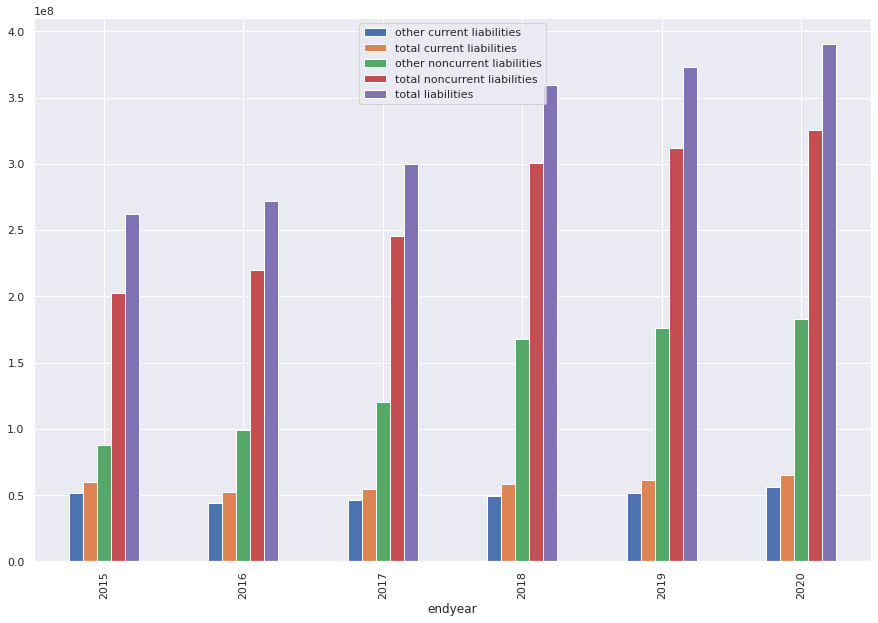

In [213]:
barbykeyword(['liabilities'])

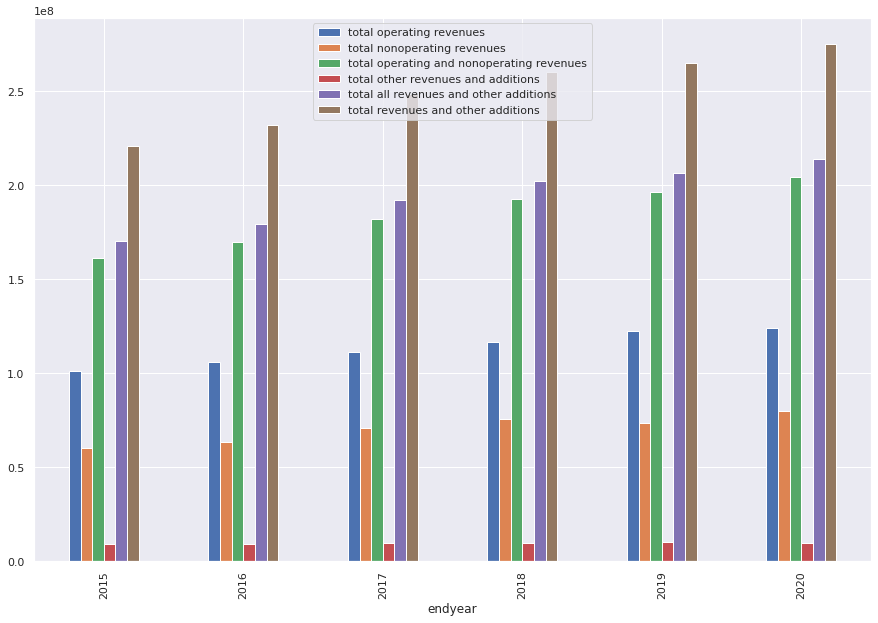

In [212]:
barbykeyword(['total', 'revenues'])

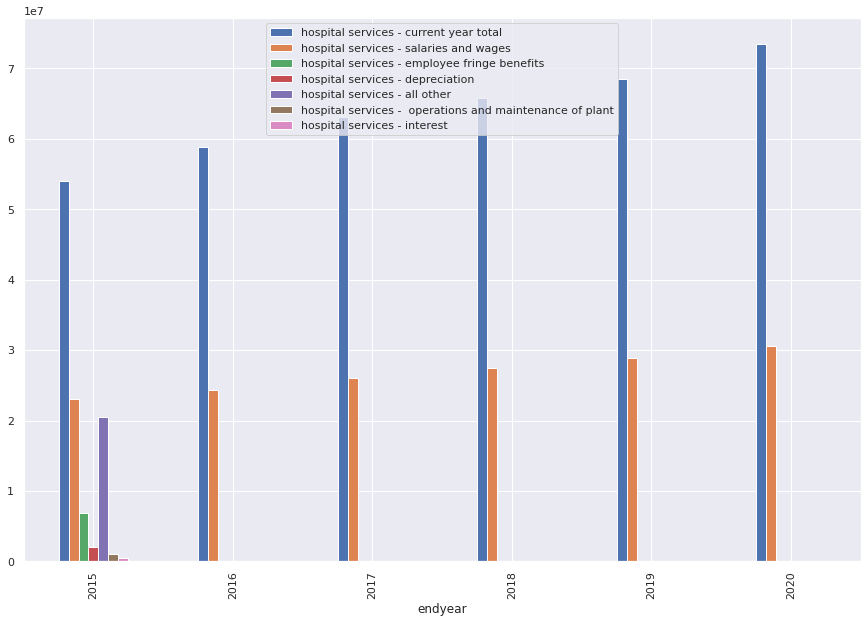

In [222]:
barbykeyword(['hospital', '-'])

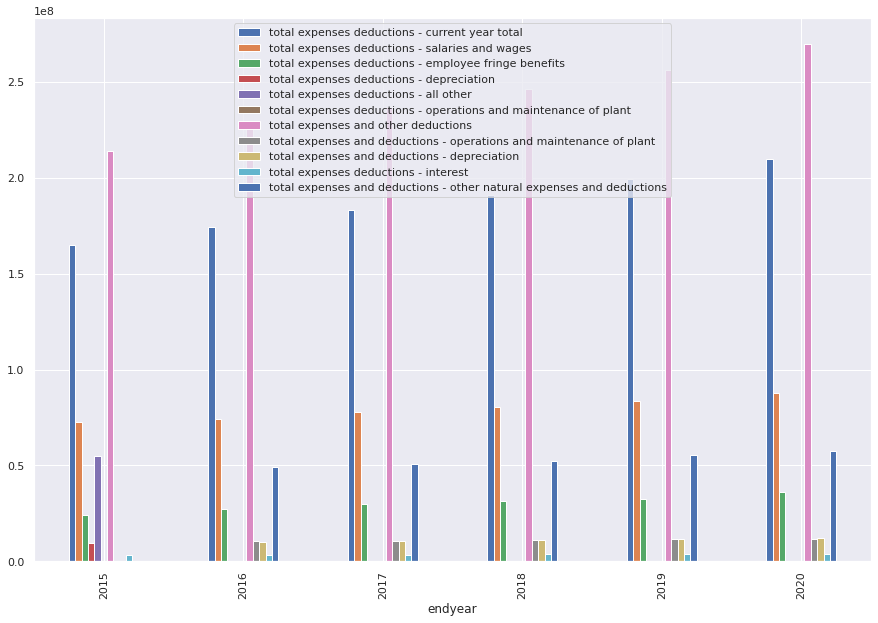

In [271]:
barbykeyword(['total expenses'])

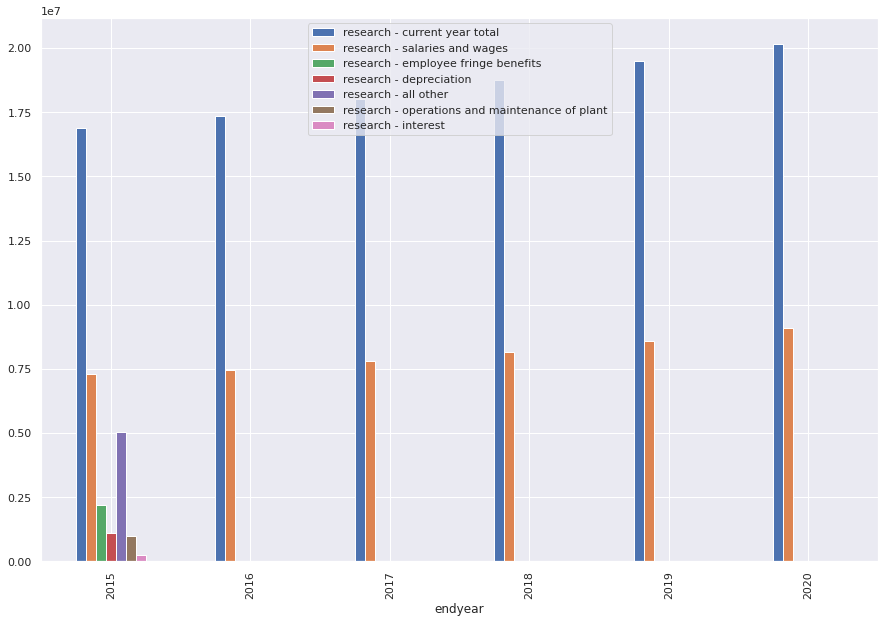

In [272]:
barbykeyword(['research'])

## Plot by trend

In [283]:
def trendbykeyword(w):
  colnames = [f for f in f1_new.columns if all(word in f for word in w)]

  data = f1_new.groupby(['endyear'], as_index=False)[colnames].mean()
  data = data.drop_duplicates()
  years = range(2015, 2021)
  data['endyear'] = years
  data = data.fillna(0)
  # return data
  data.plot(x = 'endyear', figsize = (15, 10))
  plt.ylim(bottom = 0)
  plt.legend(loc = "upper center")
  plt.show()

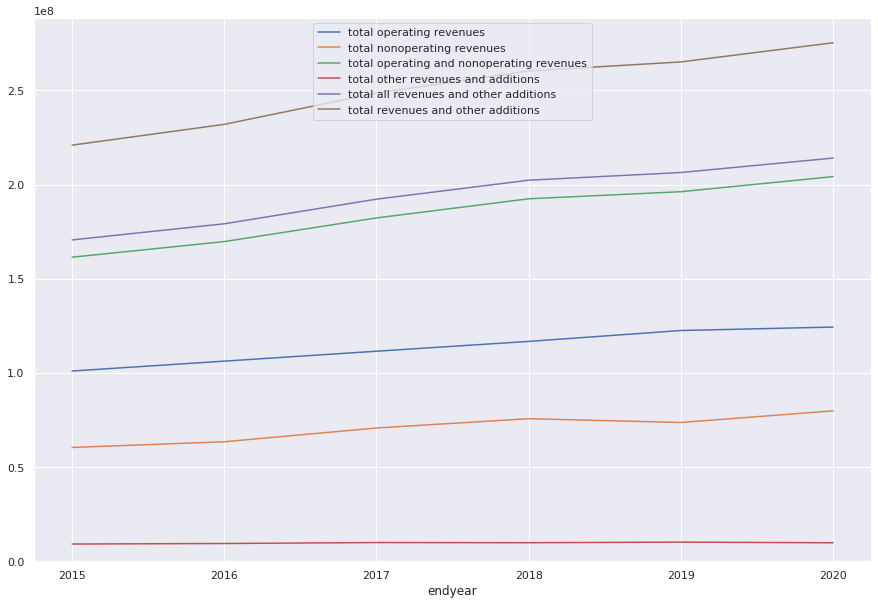

In [285]:
trendbykeyword(['total', 'revenues'])

## Regression 1

In [286]:
schools = f1_new['unitid'].drop_duplicates()
schools

0        100654
1        100663
2        100706
3        100724
4        100733
          ...  
7913     492689
9738     428453
9864     489779
9874     493725
11823    495013
Name: unitid, Length: 2010, dtype: int64

## Other

In [15]:
# drop columns with na
f1_dropped = f1.dropna(axis = 1)
#f1_dropped.columns

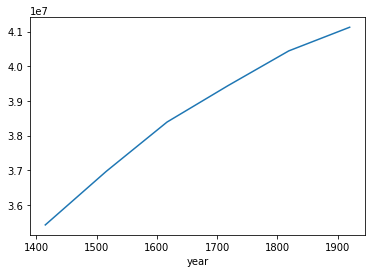

In [18]:
# F1B01 by year (Tuition and fees, after deducting discounts and allowances)

f1_dropped.groupby(['year'])['f1b01'].mean().plot()

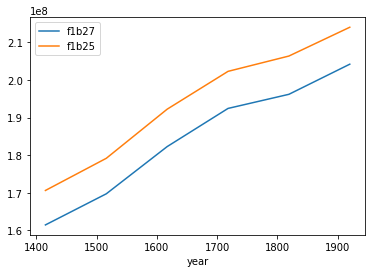

In [21]:
# F1B27 by year (Total operating and nonoperating revenues)
# F1B25 by year (Total all revenues and other additions; sum of F1B09, F1B19, and F1B24)

f1_dropped.groupby(['year'])[['f1b27', 'f1b25']].mean().plot()

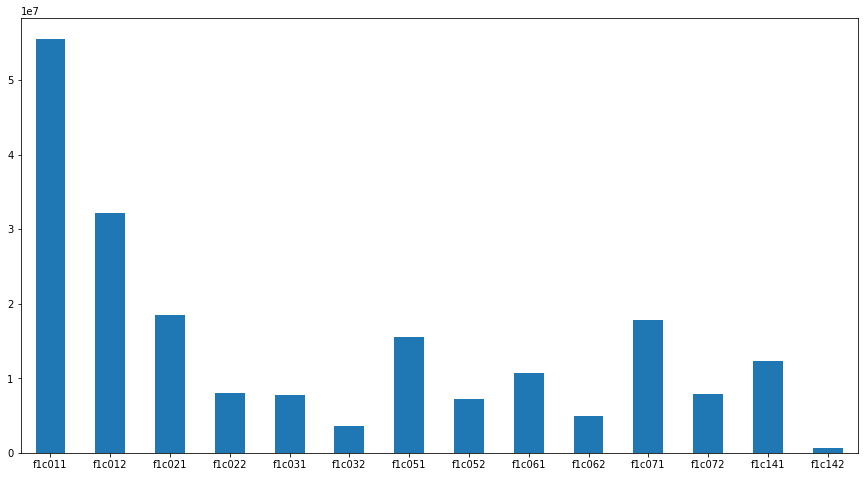

In [39]:
# F1C011 avg (Instruction - Current year total)
# F1C012 avg (Instruction - Salaries and wages)
# F1C021 avg (Research - Current year total)
# F1C022 avg (Research - Salaries and wages)
# F1C031 avg (Public service - Current year total)
# F1C032 avg (Public service - Salaries and wages)
# F1C051 avg (Academic support - Current year total)
# F1C052 avg (Academic support - Salaries and wages)
# F1C061 avg (Student services - Current year total)
# F1C062 avg (Student services - Salaries and wages)
# F1C071 avg (Institutional support - Current year total)
# F1C072 avg (Institutional support - Salaries and wages)
# F1C141 avg (Other expenses  deductions - Current year total)
# F1C142 avg (Other expenses  deductions - Salaries and wages)

f1_dropped[['f1c011', 'f1c012', 'f1c021', 'f1c022', 'f1c031', 'f1c032', 'f1c051', 'f1c052', 'f1c061', 'f1c062', 'f1c071', 'f1c072', 'f1c141', 'f1c142']].mean().plot(kind = "bar", rot = 0, figsize = (15, 8))

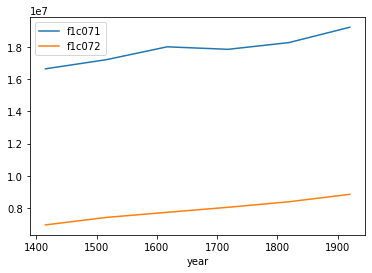

In [45]:
f1_dropped.groupby(['year'])[['f1c071', 'f1c072']].mean().plot()

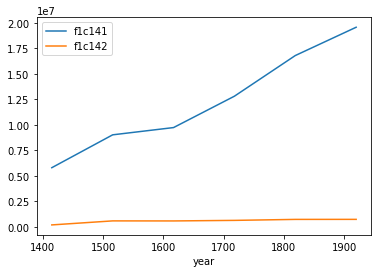

In [34]:
f1_dropped.groupby(['year'])[['f1c141', 'f1c142']].mean().plot()

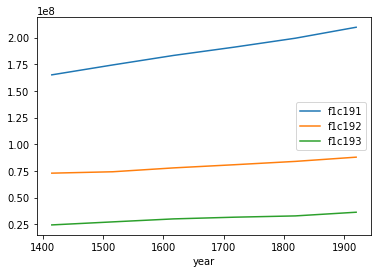

In [47]:
# F1C191 by year (Total expenses  deductions - Current year total)
# F1C192 by year (Total expenses  deductions - Salaries and wages)
# F1C193 by year (Total expenses  deductions - Employee fringe benefits)

f1_dropped.groupby(['year'])[['f1c191', 'f1c192', 'f1c193']].mean().plot()

# F2


## Preprocess

In [18]:
f2

,unitid,f2a01,f2a02,f2a03,f2a03a,f2a04,f2a05,f2a05a,f2a05b,f2a06,...,f2h03b,f2h03c,f2h03d,f2i01,f2i02,f2i03,f2i04,f2i05,f2i06,year
0,100690,8.543662e+06,1.200829e+07,3.194663e+06,1.809724e+06,8.214781e+06,5.988480e+05,1.748050e+05,424043.0,8.813629e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
1,100937,6.130582e+07,1.905859e+08,7.171504e+07,4.299803e+07,4.438267e+07,7.448816e+07,6.208192e+07,12406245.0,1.188708e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
2,101073,2.083800e+06,1.508764e+07,3.222053e+06,0.000000e+00,9.373483e+06,2.492106e+06,1.673126e+06,818980.0,1.186559e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
3,101189,2.046218e+07,9.037064e+07,4.282644e+07,3.206238e+07,3.077431e+07,1.676989e+07,1.163823e+07,5131659.0,4.754420e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
4,101435,4.831935e+07,8.463314e+07,2.667780e+07,2.306348e+07,7.279432e+06,5.067591e+07,4.828619e+07,2389726.0,5.795534e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11193,495280,7.725700e+04,2.024860e+06,1.228340e+05,9.407800e+04,1.699223e+06,2.028030e+05,0.000000e+00,202803.0,1.902026e+06,...,NaN,NaN,NaN,129147.0,1.130680e+06,228793.0,1.673233e+06,1.902026e+06,9.407800e+04,1920
11194,495314,0.000000e+00,2.988150e+06,1.590117e+07,0.000000e+00,-1.291302e+07,0.000000e+00,0.000000e+00,0.0,-1.291302e+07,...,2211182.0,0.0,0.0,-18765672.0,1.166282e+07,-18765672.0,5.904168e+06,0.000000e+00,0.000000e+00,1920
11195,495767,6.570770e+09,1.713559e+10,7.703068e+09,2.337306e+09,6.629454e+09,2.803071e+09,1.932855e+09,870216000.0,9.432525e+09,...,207489000.0,-126397000.0,40530000.0,-924020000.0,6.631981e+09,-733478000.0,1.016600e+10,5.833461e+09,2.337306e+09,1920
11196,495916,0.000000e+00,2.890460e+05,1.864020e+05,0.000000e+00,1.026440e+05,0.000000e+00,0.000000e+00,0.0,1.026440e+05,...,NaN,NaN,NaN,1437517.0,2.266049e+06,1437517.0,-1.334873e+06,2.890460e+05,0.000000e+00,1920


In [19]:
f2names.loc[929, 'shortDescription'] = "Total net assets 1920"

In [20]:
f2names[f2names['varname'] == 'F2I04']

,Unnamed: 0,varname,shortDescription,longDescription,year
929,167,F2I04,Total net assets 1920,These variables are intended to collect the nu...,1920


In [21]:
newnames = []
for c in f2.columns:
  if c == 'unitid':
    n = c
  elif c == 'year':
    n = 'year'
  else:
    cap = c.upper()
    n = list(f2names[f2names['varname'] == cap]['shortDescription'])[0]
    n = n.lower()
    n = n.strip()
    n = " ".join(n.split())
  newnames.append(n)

In [22]:
f2_new = f2.set_axis(newnames, axis = 1, inplace = False)

In [23]:
f2_new['endyear'] = f2_new['year'] % 100

In [24]:
name2 = list(f2_new.columns)
len(name2)

230

In [25]:
set([x for x in name2 if name2.count(x) > 1])

set()

In [30]:
f2_new.to_csv('nonpro_inst_fin_cleaned.csv') 
!cp nonpro_inst_fin_cleaned.csv "drive/My Drive/championship/finance/"

In [50]:
# drop columns with NA
f2_dropped = f2.dropna(axis = 1)

In [34]:
tab = medbykeyword(["instruction", "research", "public service", "academic support", "student services", "institutional support", "operation maintenance of plant",
              "scholarships and fellowships expenses", "auxiliary enterprises", "hospital services", "independent operations", "other expenses deductions",
              "total expenses", "additional (or decreased) pension expense", "scholarships and fellowships", "grants"])
tab = tab.set_index('endyear')
tab.index.names = [None]
fintab = tab.transpose()

In [36]:
fintab.to_excel('nonpro_sum_table_finance.xlsx') 
!cp nonpro_sum_table_finance.xlsx "drive/My Drive/championship/finance/"

# F3

## Preprocess

In [26]:
f3

,unitid,f3a01,f3a01a,f3a01b,f3a01c,f3a02,f3a02a,f3a03,f3a04,f3a05,...,f3c17,f3c171,f3c172,f3g01,f3g02,f3g03,f3g04,f3g05,f3g06,year
0,101116,7603406.0,0.0,1537319.0,59268.0,4247351.0,0.0,3356055.0,7603406.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
1,101277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
2,101365,10246219.0,0.0,1190304.0,19154.0,179562.0,0.0,10066657.0,10246219.0,1151647.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
3,101958,5462641.0,0.0,1477.0,0.0,218329.0,0.0,5244312.0,5462641.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
4,102845,42118552.0,0.0,4349235.0,6251743.0,4641880.0,10985.0,37476672.0,42118552.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15347,496052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1920
15348,496061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1920
15349,496265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1920
15350,496371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1920


In [27]:
f3_dropped = f3.drop(columns = ['f3b01'])

In [28]:
f3names[f3names['varname'] == 'F3G04']

,Unnamed: 0,varname,shortDescription,longDescription,year
552,101,F3G04,Total assets,These variables are intended to collect the n...,1920


In [29]:
f3names.loc[552, 'shortDescription'] = "Total assets 1920"

In [30]:
f3names[f3names['varname'] == 'F3G03']

,Unnamed: 0,varname,shortDescription,longDescription,year
551,100,F3G03,Total equity,These variables are intended to collect the n...,1920


In [31]:
f3names.loc[551, 'shortDescription'] = "Total equity 1920"

In [32]:
f3_new['total revenues and investment return'].isna().sum()

NameError: ignored

In [33]:
newnames = []
for c in f3_dropped.columns:
  if c == 'unitid':
    n = c
  elif c == 'year':
    n = 'year'
  else:
    cap = c.upper()
    n = list(f3names[f3names['varname'] == cap]['shortDescription'])[0]
    n = n.lower()
    n = n.strip()
    n = " ".join(n.split())
  newnames.append(n)

In [34]:
f3_new = f3_dropped.set_axis(newnames, axis = 1, inplace = False)

In [35]:
f3_new['endyear'] = f3_new['year'] % 100

In [49]:
name3 = list(f3_new.columns)
set([x for x in name3 if name3.count(x) > 1])

set()

In [338]:
f3_new.to_csv('forpro_inst_fin_cleaned.csv') 
!cp forpro_inst_fin_cleaned.csv "drive/My Drive/championship/finance/"

In [51]:
tab = medbykeyword(["instruction", "research", "public service", "academic support", "student services", "institutional support", "operation maintenance of plant",
              "scholarships and fellowships expenses", "auxiliary enterprises", "hospital services", "independent operations", "other expenses deductions",
              "total expenses", "additional (or decreased) pension expense", "scholarships and fellowships", "grants"])
tab = tab.set_index('endyear')
tab.index.names = [None]
fintab = tab.transpose()

In [53]:
fintab.to_excel('forpro_sum_table_finance.xlsx') 
!cp forpro_sum_table_finance.xlsx "drive/My Drive/championship/finance/"

In [52]:
# drop columns with NA
f3_dropped = f3.dropna(axis = 1)

# Col Names

In [75]:
f1nameexl = 'drive/MyDrive/championship/finance/F_F1A_1415-1920_data_descriptions.xlsx'
f2nameexl = 'drive/MyDrive/championship/finance/F_F2_1415-1920_data_descriptions.xlsx'
f3nameexl = 'drive/MyDrive/championship/finance/F_F3_1415-1920_data_descriptions.xlsx'

In [76]:
f1n = pd.read_excel(f1nameexl)
f2n = pd.read_excel(f2nameexl)
f3n = pd.read_excel(f3nameexl)

In [85]:
f1n_clean = f1n[f1n['year'] == 1415]
f2n_clean = f2n[f2n['year'] == 1415]
f3n_clean = f3n[f3n['year'] == 1415]

In [91]:
f1n_clean['varname'].size + f2n_clean['varname'].size + f3n_clean['varname'].size

496

In [92]:
allcols = pd.concat([f1n_clean, f2n_clean, f3n_clean])
allcols = allcols.sort_values(['shortDescription'])

In [95]:
allcols[allcols[['shortDescription']].duplicated() == True]

,Unnamed: 0,varname,shortDescription,longDescription,year
0,0.0,UNITID,Unique identification number of the institution,Unique identification number of the institution,1415.0
2,2.0,F2A02,Total assets,Total assets is the sum of the following amoun...,1415.0
3,3.0,F2A03,Total liabilities,Total liabilities is the sum the following amo...,1415.0
9,9.0,F2A06,Total net assets,Total net assets is the sum of unrestricted an...,1415.0
27,27.0,F2C02,Other federal grants,Other federal grants includes the amount award...,1415.0
...,...,...,...,...,...
123,123.0,F3E072,Total expenses-Salaries and wages,Total expenses-Salaries and wages is the total...,1415.0
124,124.0,F3E073,Total expenses-Benefits,Total expenses-Benefits is the total expenses ...,1415.0
125,125.0,F3E075,Total expenses-Depreciation,Total expenses-Depreciation is the total expen...,1415.0
126,126.0,F3E076,Total expenses-Interest,Total expenses-Interests is the total expenses...,1415.0


In [93]:
allcols.sort_values(['shortDescription'])

,Unnamed: 0,varname,shortDescription,longDescription,year
81,81.0,F1C055,Academic support - All other,Academic support - all other is the sum of exp...,1415.0
77,77.0,F1C051,Academic support - Current year total,Academic support - total expenses is the sum o...,1415.0
80,80.0,F1C054,Academic support - Depreciation,Academic support - depreciation is the allocat...,1415.0
79,79.0,F1C053,Academic support - Employee fringe benefits,Academic support - benefits are payments made ...,1415.0
83,83.0,F1C057,Academic support - Interest,Academic support - Interest is the amount incu...,1415.0
...,...,...,...,...,...
16,16.0,F1A17,Unrestricted,Unrestricted net assets are net assets held by...,1415.0
196,196.0,F2H01,Value of endowment assets at the beginning of ...,Value of endowment assets at the beginning Val...,1415.0
165,165.0,F1H01,Value of endowment assets at the beginning of ...,Value of endowment assets at the beginning of ...,1415.0
197,197.0,F2H02,Value of endowment assets at the end of the fi...,Value of endowment assets at the end of the fi...,1415.0


# Merge

In [66]:
m12 = f1_dropped.merge(f2_dropped, how='outer', on=['unitid', 'year'])

In [65]:
f2_dropped['year']

0        1415
1        1415
2        1415
3        1415
4        1415
         ... 
11193    1920
11194    1920
11195    1920
11196    1920
11197    1920
Name: year, Length: 11198, dtype: int64

In [74]:
m12[['unitid', 'year', 'f1c052', 'f2e042']].sort_values(['unitid', 'year']).head(20)

,unitid,year,f1c052,f2e042
0,100654,1415,2907083.0,NaN
1986,100654,1516,2922618.0,NaN
3972,100654,1617,3222890.0,NaN
5950,100654,1718,3244006.0,NaN
7914,100654,1819,4712740.0,NaN
9875,100654,1920,4136508.0,NaN
1,100663,1415,102293151.0,NaN
1987,100663,1516,107932013.0,NaN
3973,100663,1617,113706753.0,NaN
5951,100663,1718,115396646.0,NaN


# Geo Plots

In [21]:
states = inst[['unitid', 'stabbr', 'obereg']]
f1m = f1_new.merge(states, how='inner', on=['unitid'])
f1m

,unitid,total current assets,"depreciable capital assets, net of depreciation",other noncurrent assets,total noncurrent assets,total assets,"long-term debt, current portion",other current liabilities,total current liabilities,long-term debt,...,operating revenues + nonoperating revenues,change in net position,net position,expendable net assets,plant-related debt,year,endyear,cost_total,stabbr,obereg
0,100654,78535712.0,115726368.0,13423.0,115739791.0,194275503.0,1623631.0,62725127.0,64348758.0,60180723.0,...,NaN,NaN,NaN,NaN,NaN,1415,15,140396006.0,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,..."
1,100654,84634208.0,115654053.0,0.0,115654053.0,200288261.0,3301856.0,61147923.0,64449779.0,59372988.0,...,NaN,NaN,NaN,NaN,NaN,1516,16,113419320.0,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,..."
2,100654,95514685.0,102917613.0,45085227.0,148002840.0,243517525.0,3371285.0,64554128.0,67925413.0,83033120.0,...,NaN,NaN,NaN,NaN,NaN,1617,17,139355316.0,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,..."
3,100654,96249887.0,141236880.0,14808858.0,156045738.0,252295625.0,3436024.0,73480344.0,76916368.0,83758678.0,...,NaN,NaN,NaN,NaN,NaN,1718,18,114366388.0,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,..."
4,100654,104914959.0,136978850.0,26058147.0,163036997.0,267951956.0,3691441.0,81181209.0,84872650.0,81052608.0,...,NaN,NaN,NaN,NaN,NaN,1819,19,125559325.0,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8531,487320,145725788.0,195729270.0,27355773.0,223085043.0,368810831.0,11166462.0,41535435.0,52701897.0,125540531.0,...,201904145.0,-5925801.0,160985296.0,43576713.0,136706993.0,1920,20,199009498.0,Texas,"Southwest (AZ, NM, OK, TX)"
8532,490805,112081375.0,126109019.0,23131953.0,149240972.0,261322347.0,20568151.0,10272031.0,30840182.0,50834029.0,...,NaN,NaN,NaN,NaN,NaN,1617,17,152496263.0,Indiana,"Great Lakes (IL, IN, MI, OH, WI)"
8533,490805,105549352.0,132307347.0,27617956.0,159925303.0,265474655.0,19976668.0,8949054.0,28925722.0,47205540.0,...,NaN,NaN,NaN,NaN,NaN,1718,18,149363689.0,Indiana,"Great Lakes (IL, IN, MI, OH, WI)"
8534,490805,129700854.0,141858224.0,30473612.0,172331836.0,302032690.0,21260233.0,10770855.0,32031088.0,76617738.0,...,NaN,NaN,NaN,NaN,NaN,1819,19,145479164.0,Indiana,"Great Lakes (IL, IN, MI, OH, WI)"


In [22]:
f1m['fedgrant'] = f1m['federal nonoperating grants'] + f1m['federal operating grants and contracts']
f1m['instgrant'] = f1m['institutional grants from restricted resources'] + f1m['institutional grants from unrestricted resources']

In [23]:
colpub = ['academic support - current year total', 'additional (or decreased) pension expense', 'auxiliary enterprises -- current year total', 
          'institutional support - current year total', 'instruction - current year total', 'public service - current year total', 
          'scholarships and fellowships expenses -- current year total', 'student services - current year total', 'fedgrant', 'instgrant', 'local/private operating grants and contracts',
          'grants by state government', 'cost_total']

In [24]:
f1plot = f1m.groupby(['stabbr'], as_index=False)[colpub].mean()

In [25]:
pip install plotly-express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
f1plot.head()

,stabbr,academic support - current year total,additional (or decreased) pension expense,auxiliary enterprises -- current year total,institutional support - current year total,instruction - current year total,public service - current year total,scholarships and fellowships expenses -- current year total,student services - current year total,fedgrant,instgrant,local/private operating grants and contracts,grants by state government,cost_total
0,Alabama,1.456095e+07,6.516663e+06,1.601638e+07,1.906728e+07,4.818154e+07,1.113072e+07,7.002370e+06,1.158116e+07,2.971917e+07,1.702641e+07,3.393441e+06,3.387793e+05,1.275404e+08
1,Alaska,1.975452e+07,4.141010e+06,1.175377e+07,2.038530e+07,6.321813e+07,1.345363e+07,6.081973e+06,1.646927e+07,3.752928e+07,5.065460e+06,1.108433e+07,1.444423e+05,1.511166e+08
2,American Samoa,5.782092e+05,1.102864e+06,1.331560e+05,3.385101e+06,4.527728e+06,0.000000e+00,1.084842e+06,8.594142e+05,9.830356e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.056845e+07
3,Arizona,3.891190e+07,4.346077e+06,2.781235e+07,2.836432e+07,1.002094e+08,8.266226e+06,1.998294e+07,2.020943e+07,5.300408e+07,3.686499e+07,1.233148e+07,5.705013e+05,2.437565e+08
4,Arkansas,6.675631e+06,4.078719e+05,1.151682e+07,8.021939e+06,2.673283e+07,5.682264e+06,5.079596e+06,5.351241e+06,1.298027e+07,7.091623e+06,1.775130e+06,3.431346e+06,6.906032e+07


In [31]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}
f1plot['code'] = f1plot['stabbr'].map(code)
pubplot['code'] = pubplot['stabbr'].map(code)

In [85]:
pub_abs.head()

,Unnamed: 0,unitid,instnm,ialias,stabbr,zip,obereg,iclevel,control,ugoffer,...,fee_fee7,fee_hrchg7,fee_chg3tgtd,fee_chg3fgtd,fee_chg4ay3,fee_chg3ay3,fee_chg6ay3,fee_chg7ay3,fee_chg8ay3,time
0,0,100654,Alabama A & M University,AAMU,Alabama,35762,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Four or more years,Public,Undergraduate degree or certificate offering,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1,1,100654,Alabama A & M University,AAMU,Alabama,35762,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Four or more years,Public,Undergraduate degree or certificate offering,...,1596.0,786.0,NaN,NaN,1600.0,17136.0,3790.0,8140.0,3790.0,0.0
2,2,100654,Alabama A & M University,AAMU,Alabama,35762,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Four or more years,Public,Undergraduate degree or certificate offering,...,1236.0,826.0,NaN,NaN,1600.0,17496.0,3090.0,8830.0,3090.0,1.0
3,3,100654,Alabama A & M University,AAMU,Alabama,35762,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Four or more years,Public,Undergraduate degree or certificate offering,...,1478.0,836.0,NaN,NaN,1600.0,18236.0,2580.0,8379.0,2580.0,2.0
4,4,100654,Alabama A & M University,AAMU,Alabama,35762,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",Four or more years,Public,Undergraduate degree or certificate offering,...,1134.0,840.0,NaN,NaN,1600.0,18354.0,2990.0,9128.0,2990.0,3.0


In [30]:
pubplot = pub_abs.groupby(['stabbr'], as_index=False)['finaid_uagrntt', 'fee_chg3ay3'].mean()

<ipython-input-30-4ad82899dd3c>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [91]:
pubplot.head()

,stabbr,gradrate_4yr_completer150_,completion_total,code
0,Alabama,0.455289,1518.289474,AL
1,Alaska,0.339741,1158.125000,AK
2,American Samoa,0.666667,237.333333,NaN
3,Arizona,0.607746,3511.568182,AZ
4,Arkansas,0.395131,1307.911111,AR


In [33]:
import plotly.express as px
fig = px.choropleth(pubplot,
                    locations= 'code', 
                    locationmode= "USA-states", 
                    scope= "usa",
                    color= 'fee_chg3ay3',
                    color_continuous_scale= "spectral_r", )
#fig.add_scattergeo(
    #locations = f1plot['code'],    ###codes for states,
    #locationmode = 'USA-states',
    #text = f1plot['code'],
    #mode= 'text')
fig.show()

# Trend Plot

In [15]:
cpi['year'] = range(15, 21)
cpi = cpi.set_index('year')

In [19]:
f1_new['cost_total'] = f1_new['academic support - current year total'] + f1_new['auxiliary enterprises -- current year total'] + f1_new['institutional support - current year total'] + f1_new['instruction - current year total'] + f1_new['public service - current year total'] + f1_new['scholarships and fellowships expenses -- current year total'] + f1_new['student services - current year total']

In [31]:
f1_cpi = pd.concat([tab, cpi['USACPIALLMINMEI']], axis = 1)

In [32]:
f1_cpi

,federal operating grants and contracts,state operating grants and contracts,local/private operating grants and contracts,local operating grants and contracts,private operating grants and contracts,sales and services of auxiliary enterprises,independent operations,federal nonoperating grants,state nonoperating grants,local nonoperating grants,...,discounts and allowances from other federal grants applied to auxiliary enterprises,total discounts and allowances from state government grants,discounts and allowances from state government grants applied to tuition and fees,discounts and allowances from state government grants applied to auxiliary enterprises,discounts and allowances from local government grants,discounts and allowances from local government grants applied to tuition and fees,discounts and allowances from local government grants applied to auxiliary enterprises,discounts and allowances from endowments and gifts applied to auxiliary enterprises,discounts and allowances from other institutional sources applied to auxiliary enterprises,USACPIALLMINMEI
15,1031706.0,512076.5,93637.0,0.0,0.0,2006275.5,0.0,6829310.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.957387
16,1012234.0,483005.0,94113.5,0.0,0.0,1884672.5,0.0,6206912.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.456364
17,980822.5,476879.0,96862.0,0.0,0.0,1835217.0,0.0,5851205.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.577731
18,1081972.0,528640.0,105366.0,0.0,0.0,1770318.0,0.0,6166173.5,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.199977
19,1054324.0,533834.0,117168.0,0.0,600.0,1682260.0,0.0,6149517.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.840716
20,1270223.0,552838.0,110774.0,0.0,0.0,1472625.0,0.0,6857412.0,0.0,0.0,...,0.0,165899.5,145404.5,0.0,0.0,0.0,0.0,0.0,0.0,110.364235


In [137]:
f1_cpi['USACPIALLMINMEI']

15     99.957387
16    102.456364
17    104.577731
18    106.199977
19    108.840716
20    110.364235
Name: USACPIALLMINMEI, dtype: float64

In [149]:
f1_cpi['cost_total'] = f1_cpi['academic support - current year total'] + f1_cpi['auxiliary enterprises -- current year total'] + f1_cpi['institutional support - current year total'] + f1_cpi['instruction - current year total'] + f1_cpi['public service - current year total'] + f1_cpi['scholarships and fellowships expenses -- current year total'] + f1_cpi['student services - current year total']

In [35]:
#pub_abs['year_actual'] = pub_abs['year'] + 1
finaid = pub_abs.groupby('year', as_index = False)['finaid_uagrntt', 'fee_chg3ay3'].median()
finaid = finaid.set_index('year')
#finaid = finaid[:6]

<ipython-input-35-e2796706e356>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  finaid = pub_abs.groupby('year', as_index = False)['finaid_uagrntt', 'fee_chg3ay3'].median()


In [36]:
finaid

,finaid_uagrntt,fee_chg3ay3
year,,
2015.0,14960763.0,9784.0
2016.0,14093136.0,10082.0
2017.0,13713332.5,10343.5
2018.0,14370350.0,10448.0
2019.0,14137551.5,10563.0
2020.0,15265025.0,10608.0
2021.0,14867059.0,10749.0


In [38]:
f1totalcost = f1_new.groupby('endyear', as_index = False)['cost_total'].median()
f1totalcost = f1totalcost.set_index('endyear')
f1_cpi = pd.concat([f1totalcost, cpi['USACPIALLMINMEI']], axis = 1)
f1_cpi

,cost_total,USACPIALLMINMEI
15,58220943.5,99.957387
16,57312150.5,102.456364
17,57202118.0,104.577731
18,59440029.0,106.199977
19,59252815.5,108.840716
20,60820694.0,110.364235


In [53]:
cost_15 = []
cpi_15 = []

cost_15.append(0)
cpi_15.append(0)

for i in range(1, 6):
  cost = (list(f1_cpi['cost_total'])[i] - list(f1_cpi['cost_total'])[0]) / list(f1_cpi['cost_total'])[0] * 100
  cpi = (list(f1_cpi['USACPIALLMINMEI'])[i] - list(f1_cpi['USACPIALLMINMEI'])[0]) / list(f1_cpi['USACPIALLMINMEI'])[0] * 100
  cost_15.append(cost)
  cpi_15.append(cpi)
f1_cpi['cost15'] = cost_15
f1_cpi['cpi15'] = cpi_15

In [66]:
finaid

,finaid_uagrntt,fee_chg3ay3,fa15,fee15
year,,,,
2015.0,14960763.0,9784.0,0.000000,0.000000
2016.0,14093136.0,10082.0,-5.799350,3.045789
2017.0,13713332.5,10343.5,-8.338014,5.718520
2018.0,14370350.0,10448.0,-3.946410,6.786590
2019.0,14137551.5,10563.0,-5.502470,7.961979
2020.0,15265025.0,10608.0,2.033733,8.421913
2021.0,14867059.0,10749.0,-0.626332,9.863042


In [65]:
fa15 = []
fee15 = []

fa15.append(0)
fee15.append(0)

for i in range(1, 7):
  fa = (list(finaid['finaid_uagrntt'])[i] - list(finaid['finaid_uagrntt'])[0]) / list(finaid['finaid_uagrntt'])[0] * 100
  f22 = (list(finaid['fee_chg3ay3'])[i] - list(finaid['fee_chg3ay3'])[0]) / list(finaid['fee_chg3ay3'])[0] * 100
  fa15.append(fa)
  fee15.append(f22)
finaid['fa15'] = fa15
finaid['fee15'] = fee15

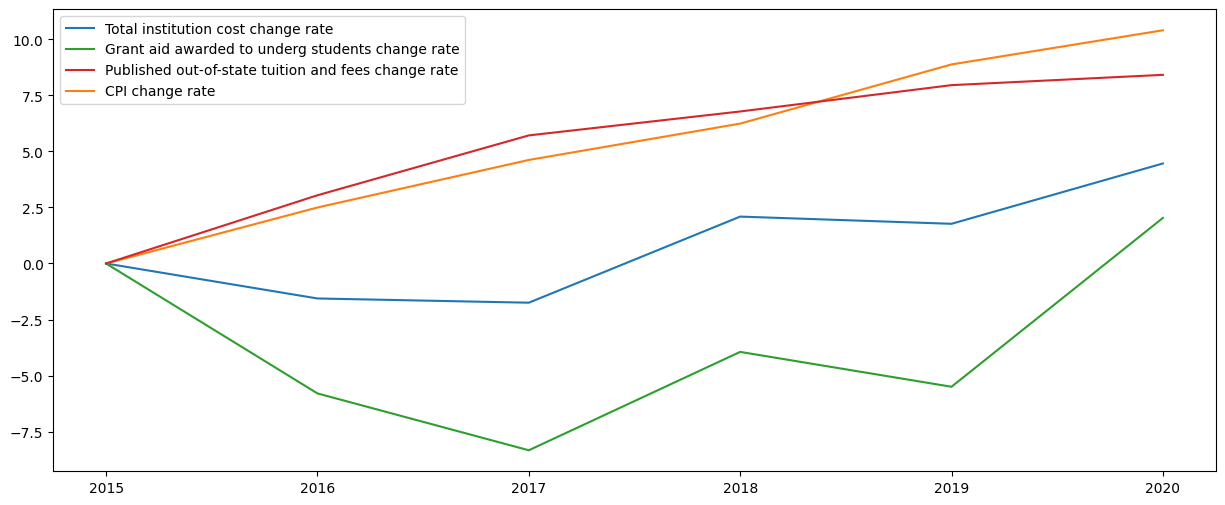

In [71]:

ln1 = plt.plot(['2015', '2016', '2017', '2018', '2019', '2020'], f1_cpi['cost15'], label = "Total institution cost change rate")
ln4 = plt.plot(['2015', '2016', '2017', '2018', '2019', '2020'], f1_cpi['cpi15'], label = "CPI change rate")
ln2 = plt.plot(['2015', '2016', '2017', '2018', '2019', '2020'], list(finaid['fa15'])[:6], label = "Grant aid awarded to underg students change rate")
ln3 = plt.plot(['2015', '2016', '2017', '2018', '2019', '2020'], list(finaid['fee15'])[:6], label = "Published out-of-state tuition and fees change rate")

lns = ln1 + ln2 + ln3 + ln4
labs = [l.get_label() for l in lns]
plt.legend(lns, labs)
plt.rcParams["figure.figsize"] = (15, 6)
plt.show()

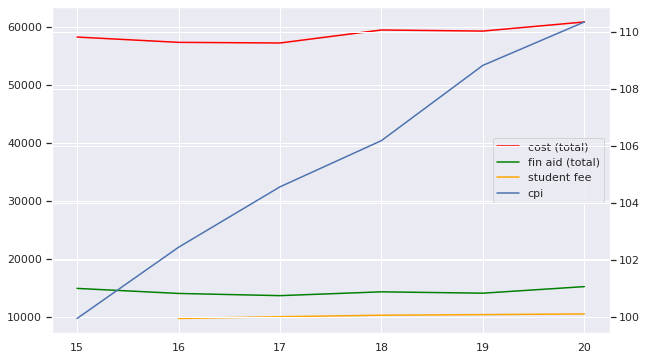

In [182]:
# public school cost
fig, ax1 = plt.subplots(figsize = (10, 6))
ax2 = ax1.twinx()

ln1 = ax1.plot(f1_cpi.index, f1_cpi['cost_total'] / 1000, color = 'red', label = "cost (total)")
ln2 = ax1.plot(f1_cpi.index, finaid['finaid_uagrntt'] / 1000, color = 'green', label = "fin aid (total)")
ln3 = ax1.plot(f1_cpi.index, finaid['fee_chg3ay3'], color = 'orange', label = "student fee")

ln4 = ax2.plot(f1_cpi.index, f1_cpi['USACPIALLMINMEI'], label = "cpi")

lns = ln1 + ln2 + ln3 + ln4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

fig.show()

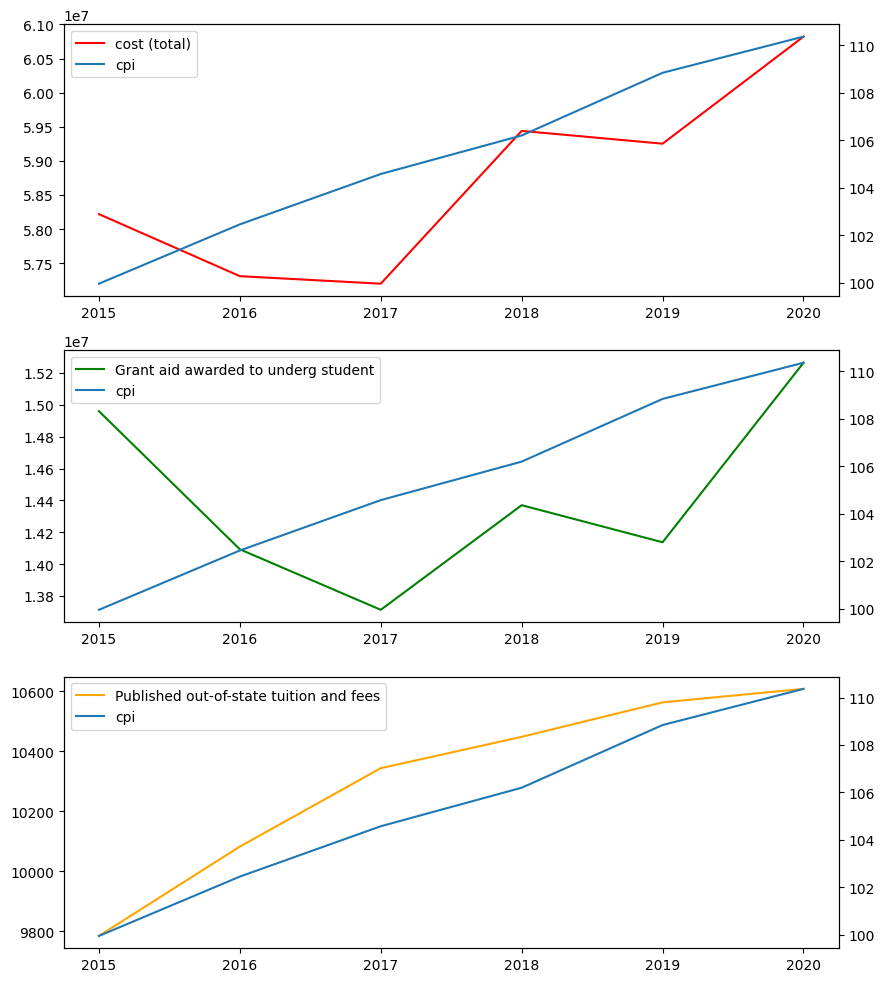

In [48]:
import matplotlib
matplotlib.rc_file_defaults()
# public school cost
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (10, 12))
ax4 = ax1.twinx()
ax5 = ax2.twinx()
ax6 = ax3.twinx()

ln1 = ax1.plot(['2015', '2016', '2017', '2018', '2019', '2020'], f1_cpi['cost_total'], color = 'red', label = "cost (total)")
ln4 = ax4.plot(['2015', '2016', '2017', '2018', '2019', '2020'], f1_cpi['USACPIALLMINMEI'], label = "cpi")

ln2 = ax2.plot(['2015', '2016', '2017', '2018', '2019', '2020'], list(finaid['finaid_uagrntt'])[:6], color = 'green', label = "Grant aid awarded to underg student")
ln5 = ax5.plot(['2015', '2016', '2017', '2018', '2019', '2020'], list(f1_cpi['USACPIALLMINMEI']), label = "cpi")

ln3 = ax3.plot(['2015', '2016', '2017', '2018', '2019', '2020'], list(finaid['fee_chg3ay3'])[:6], color = 'orange', label = "Published out-of-state tuition and fees")
ln6 = ax6.plot(['2015', '2016', '2017', '2018', '2019', '2020'], list(f1_cpi['USACPIALLMINMEI']), label = "cpi")

lns1 = ln1 + ln4
labs1 = [l.get_label() for l in lns1]
ax1.legend(lns1, labs1)

lns2 = ln2 + ln5
labs2 = [l.get_label() for l in lns2]
ax2.legend(lns2, labs2, loc = 0)

lns3 = ln3 + ln6
labs3 = [l.get_label() for l in lns3]
ax3.legend(lns3, labs3)

fig.show()

In [196]:
finaid['fee_chg3ay3']

year_actual
15        NaN
16     9784.0
17    10082.0
18    10343.5
19    10448.0
20    10563.0
Name: fee_chg3ay3, dtype: float64

In [ ]:
finaid

,finaid_uagrntt
year_actual,
15,14960763.0
16,14093136.0
17,13713332.5
18,14370350.0
19,14137551.5
20,15265025.0


# Box Plots

In [96]:
f1m.head()

,unitid,total current assets,"depreciable capital assets, net of depreciation",other noncurrent assets,total noncurrent assets,total assets,"long-term debt, current portion",other current liabilities,total current liabilities,long-term debt,...,change in net position,net position,expendable net assets,plant-related debt,year,endyear,stabbr,obereg,fedgrant,instgrant
0,100654,78535712.0,115726368.0,13423.0,115739791.0,194275503.0,1623631.0,62725127.0,64348758.0,60180723.0,...,NaN,NaN,NaN,NaN,1415,15,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",39265511,12643661.0
1,100654,84634208.0,115654053.0,0.0,115654053.0,200288261.0,3301856.0,61147923.0,64449779.0,59372988.0,...,NaN,NaN,NaN,NaN,1516,16,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",40122218,14795618.0
2,100654,95514685.0,102917613.0,45085227.0,148002840.0,243517525.0,3371285.0,64554128.0,67925413.0,83033120.0,...,NaN,NaN,NaN,NaN,1617,17,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",40133602,19834079.0
3,100654,96249887.0,141236880.0,14808858.0,156045738.0,252295625.0,3436024.0,73480344.0,76916368.0,83758678.0,...,NaN,NaN,NaN,NaN,1718,18,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",40702754,23325276.0
4,100654,104914959.0,136978850.0,26058147.0,163036997.0,267951956.0,3691441.0,81181209.0,84872650.0,81052608.0,...,NaN,NaN,NaN,NaN,1819,19,Alabama,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",41523704,26655033.0


In [104]:
set(list(f1m['obereg']))

{'Far West (AK, CA, HI, NV, OR, WA)',
 'Great Lakes (IL, IN, MI, OH, WI)',
 'Mid East (DE, DC, MD, NJ, NY, PA)',
 'New England (CT, ME, MA, NH, RI, VT)',
 'Other U.S. jurisdictions (AS, FM, GU, MH, MP, PR, PW, VI)',
 'Plains (IA, KS, MN, MO, NE, ND, SD)',
 'Rocky Mountains (CO, ID, MT, UT, WY)',
 'Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)',
 'Southwest (AZ, NM, OK, TX)'}

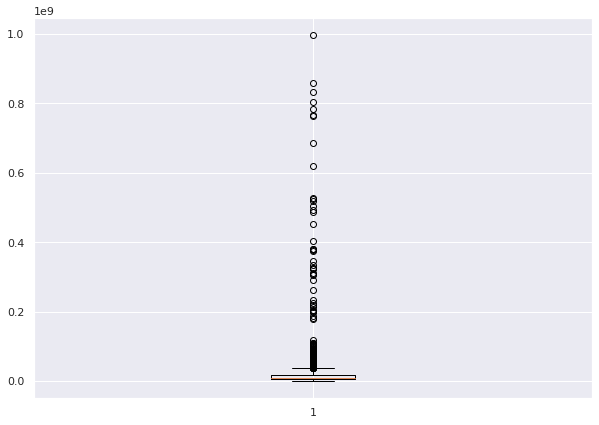

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10, 7))
plt.boxplot(f1m[f1m['obereg'] == 'Far West (AK, CA, HI, NV, OR, WA)']['academic support - current year total'])
plt.show()